# Recoleccion de datos


In [ ]:
# fruit: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition?select=train
# fashion: https://github.com/zalandoresearch/fashion-mnist

# Procesamiento de datos

In [4]:
import torch
import torchvision
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Create a list with the filepaths for training and testing
train_dir = Path(r'C:\\Users\\fabian\\Documents\\Code USM\\RedesNeuronales\\fruits\\train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))


test_dir = Path(r'C:\\Users\\fabian\\Documents\\Code USM\\RedesNeuronales\\fruits\\test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)


In [9]:
print(f"Total training images: {len(train_filepaths)}")
print(f"Total test images: {len(test_filepaths)}")



Total training images: 350
Total test images: 43


In [17]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 350

Number of different labels: 5

Labels: ['lettuce' 'apple' 'banana' 'lemon' 'carrot']


In [15]:
# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(5)

,Filepath,Label
0,C:\Users\fabian\Documents\Code USM\RedesNeuron...,lettuce
1,C:\Users\fabian\Documents\Code USM\RedesNeuron...,lettuce
2,C:\Users\fabian\Documents\Code USM\RedesNeuron...,lettuce
3,C:\Users\fabian\Documents\Code USM\RedesNeuron...,apple
4,C:\Users\fabian\Documents\Code USM\RedesNeuron...,lettuce


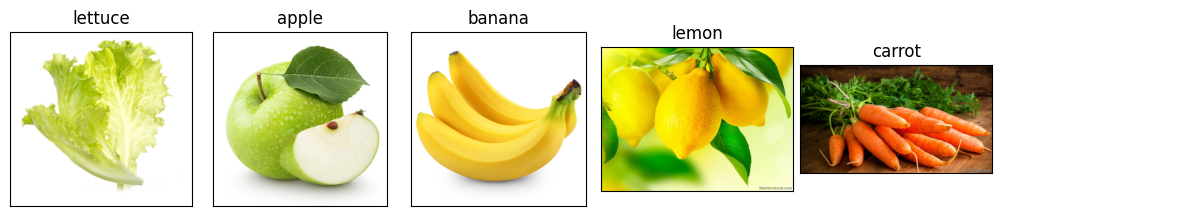

In [18]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Define the number of rows and columns based on the size of df_unique
num_images = len(df_unique)
ncols = 6
nrows = (num_images // ncols) + (num_images % ncols > 0)

# Create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 2, nrows * 2),
                         subplot_kw={'xticks': [], 'yticks': []})

# Flatten axes to handle cases with fewer images than subplots
axes = axes.flatten()

# Loop through the images and plot them
for i, ax in enumerate(axes):
    if i < num_images:
        ax.imshow(plt.imread(df_unique.Filepath[i]))
        ax.set_title(df_unique.Label[i], fontsize=12)
    else:
        ax.axis('off')  # Turn off axes for unused subplots

plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

In [ ]:
batch_size =  # Elegir numero de muestras por batch

trainloader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=True)